In [2]:
#1. Import libraries
from pandas import read_excel
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
import numpy as np
from sklearn import metrics
from statsmodels.tsa.api import Holt
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [4]:
hui = read_excel('HUI_daily2.xls', sheet_name = 'Data1', header = 0, index_col = 0, squeeze = True)
print(hui.index)

DatetimeIndex(['1994-12-16', '1994-12-19', '1994-12-20', '1994-12-21',
               '1994-12-22', '1994-12-23', '1994-12-27', '1994-12-28',
               '1994-12-29', '1994-12-30',
               ...
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30'],
              dtype='datetime64[ns]', name='dates', length=6366, freq=None)


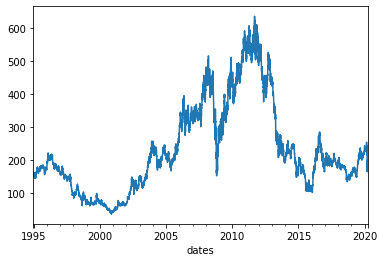

In [2]:
#Plot time plot original data
hui.index = pd.DatetimeIndex(hui.index).to_period('D')
#Retrieve time plot
hui.plot()
pyplot.show()


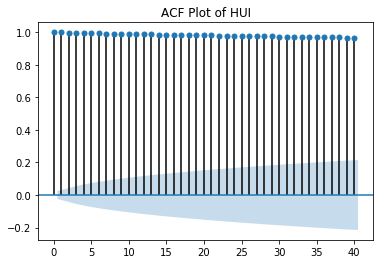

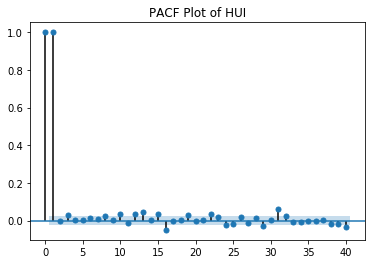

In [6]:
#Preliminary Analysis
plot_acf(hui, title = 'ACF Plot of HUI', lags = 40)
plot_pacf(hui, title = 'PACF Plot of HUI', lags = 40)
pyplot.show()


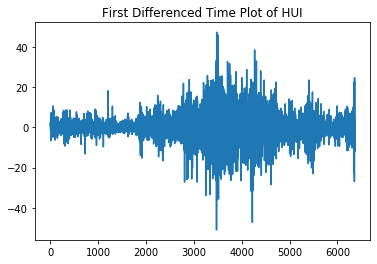

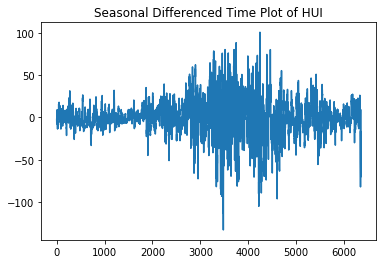

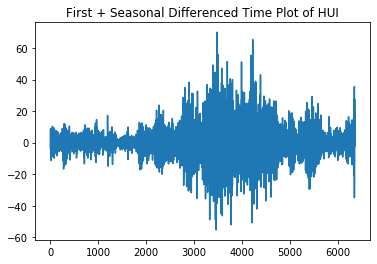

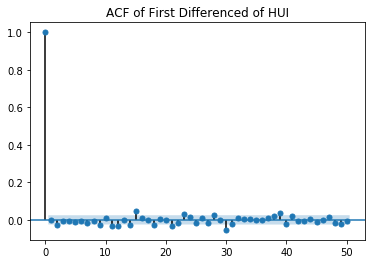

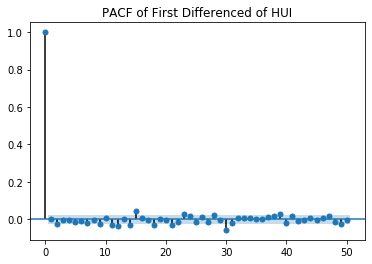

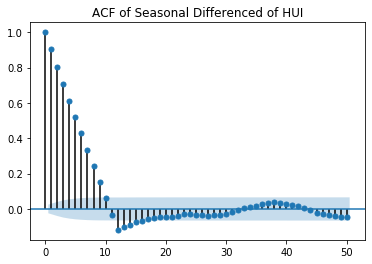

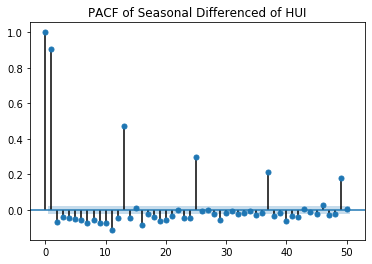

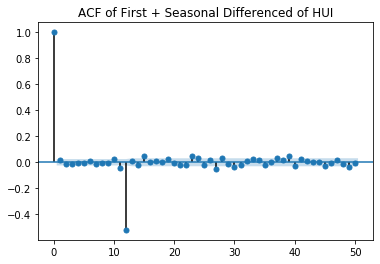

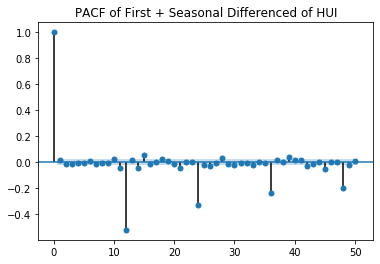

In [4]:
#Formulate first and differencing for model selection based on preliminary analysis
hui = read_excel('HUI_daily.xlsx', sheet_name = 'Data2', header = 0, index_col = 0, squeeze = True)

dt = hui.values

#pyplot.plot(dt)
#pyplot.show()

#First Differencing
fst_diff = list()
for i in range(1, len(dt)):
    fst_values = dt[i] - dt[i - 1]
    fst_diff.append(fst_values)
#Plot seasonally differenced series
pyplot.plot(fst_diff)
pyplot.title("First Differenced Time Plot of HUI")
pyplot.show()

#Additional case: Seasonal Differencing and First Differencing
#Seasonal Differencing
seas_diff = list()
for i in range(12, len(dt)):
    seas_values = dt[i] - dt[i - 12]
    seas_diff.append(seas_values)
#Plot seasonally differenced series
pyplot.plot(seas_diff)
pyplot.title("Seasonal Differenced Time Plot of HUI")

pyplot.show()

#First + Seasonal Differencing
Y = fst_diff
fst_seas_diff = list()
for i in range(12, len(fst_diff)):
    fst_seas_values = Y[i] - Y[i - 12]
    fst_seas_diff.append(fst_seas_values)
pyplot.plot(fst_seas_diff)
pyplot.title("First + Seasonal Differenced Time Plot of HUI")
pyplot.show()


#Plot ACF plot of differenced data for parameter/model selection

plot_acf(fst_diff, title = 'ACF of First Differenced of HUI', lags = 50)
plot_pacf(fst_diff, title = 'PACF of First Differenced of HUI', lags = 50)
pyplot.show()

plot_acf(seas_diff, title = 'ACF of Seasonal Differenced of HUI', lags = 50)
plot_pacf(seas_diff, title = 'PACF of Seasonal Differenced of HUI', lags = 50)
pyplot.show()

plot_acf(fst_seas_diff, title = 'ACF of First + Seasonal Differenced of HUI', lags = 50)
plot_pacf(fst_seas_diff, title = 'PACF of First + Seasonal Differenced of HUI', lags = 50)
pyplot.show()


In [3]:
#Automatic Test of Parameters for model selection 
import warnings
import itertools

hui = read_excel('HUI_daily2.xls', sheet_name = 'Data1', header = 0, index_col = 0, squeeze = True)
hui.index = pd.DatetimeIndex(hui.index).to_period('D')
#hui2 = read_excel('HUI_daily.xlsx', sheet_name = 'Data1', header = 0, index_col = 0, parse_dates = True, squeeze = True)
dt = hui.values

p = q = range(1,3)
d = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
###Caution:Running this code may take time by 10-15 minutes depending on the device.
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#print(len(pdq))
warnings.filterwarnings("ignore") # specify to ignore warning messages

collectAICs=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dt,
                                            order = param,
                                            seasonal_order = param_seasonal,                                        
                                            enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:41845.747573684675
ARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:41838.89269049834
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:41813.78122493114
ARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:41815.497576333284
ARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:41838.72686778188
ARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:41841.40533628871
ARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:41814.882103615906
ARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:41817.467399628746
ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:41843.76847427743
ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:41836.68861927507
ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:41811.689081563556
ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:41812.993200397264
ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:41836.51824376096
ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:41838.03114475033
ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:41812.806931052604
ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:41815.51675319616
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:41820.544232912056
ARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:41819.93366922876
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:418

In [38]:
#ARIMA/SARIMA Modelling
#hui = read_excel('HUI_daily.xlsx', sheet_name = 'Data2', header = 0, index_col = 0, sqeeze = True)
#hui2 = read_excel('hui_daily2.xls', sheet_name = 'Data1', header = 0, parse_dates = True, squeeze = True)
#print(hui2.index)


#Create training and testing set
train = hui[:4457]
test = hui[4457:]
#print(len(hui2[:4457]))
#print(len(hui2[4457:]))

#Read the data and fit it to the model.
hui = read_excel('hui_daily2.xls', sheet_name = 'Data1', index_col = 0,
               header = 0, parse_dates = True, squeeze = True)
#hui2 = hui2.set_index("dates")

#Convert the date index (index refers to the date) into daily level 
hui.index = pd.DatetimeIndex(hui.index).to_period('D')

sar = sm.tsa.statespace.SARIMAX(train, order = (2,1,2), 
                                seasonal_order = (1,1,2,12)) #The data put into the model is training set.

sar_train_fit = sar.fit(disp = False)
#print(sar_train_fit.summary())
###Ref: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#hui3 = read_excel('hui_daily2.xls', sheet_name = 'Data1', index_col = 0, header = 0, parse_dates = True, sqeeze = True)


dates
1994-12-16      0.000000
1994-12-19    153.900030
1994-12-20    154.909855
1994-12-21    157.369938
1994-12-22    155.940038
                 ...    
2012-08-20    434.451813
2012-08-21    437.621607
2012-08-22    444.578867
2012-08-23    453.950497
2012-08-24    454.593772
Freq: D, Length: 4457, dtype: float64
dates
2012-08-27    455.093558
2012-08-28    455.274665
2012-08-29    455.023604
2012-08-30    455.114260
2012-08-31    456.454459
                 ...    
2020-03-24    586.293725
2020-03-25    586.058763
2020-03-26    585.876981
2020-03-27    586.149588
2020-03-30    585.757135
Freq: D, Length: 1909, dtype: float64
             lower HUI    upper HUI
dates                              
2012-08-27  441.653267   468.533850
2012-08-28  436.229647   474.319684
2012-08-29  431.833369   478.213839
2012-08-30  428.466496   481.762024
2012-08-31  426.714442   486.194476
...                ...          ...
2020-03-24 -104.703088  1277.290538
2020-03-25 -105.175729  1277.293255
20

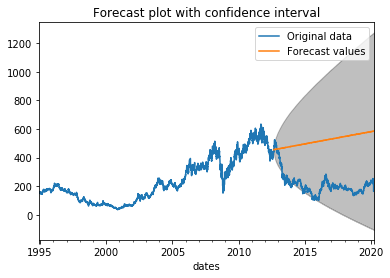

In [39]:
#In-sample forecasting over (length of) test set based on the model obtained by training set. 
train_fcast = sar_train_fit.get_forecast(steps = len(test))

#For forecasting results, the datetime index will not involve in holidays and weekends (absense of date). 
#For the real data, there would be various absent dates as no trading occur at some holidays and weekends (business days only).
#In order to plot them altogether, the date time index should be consistent.
#Here we let the time index of forecasting results over test = time index of real data
temp = train_fcast.predicted_mean.copy()
temp.index = test.index
#print(sar_train_fit.fittedvalues)
#print(temp)

## Get confidence intervals of forecasts, which will be plotted afterwards.
#For inconsistent time index, we do the same manipulation as we did previously.
temp2 = train_fcast.conf_int()
temp2.index = test.index
#print(temp2)

train_fcast_ci = temp2

# plotting forecasts ahead
ax = hui.plot(label = 'Original data')
temp.plot(ax = ax, label = 'Forecast values', title = 'Forecast plot with confidence interval')
ax.fill_between(train_fcast_ci.index,
                train_fcast_ci.iloc[:, 0],
                train_fcast_ci.iloc[:, 1], color = 'k', alpha = 0.25)

plt.legend()
plt.show()


In [10]:
print(pred_ci) #Confidence interval for in-sample forecast
print(fcast_ci)#Confidence interval for out-sample forecast
print(pred_uc.predicted_mean) #Obtain the value

             lower HUI   upper HUI
dates                             
2012-08-16  412.291157  437.627079
2012-08-17  425.816970  451.152892
2012-08-20  421.581742  446.917664
2012-08-21  424.879874  450.215705
2012-08-22  431.326289  456.662120
...                ...         ...
2020-03-24  166.077689  191.403529
2020-03-25  189.256153  214.581993
2020-03-26  194.639447  219.965288
2020-03-27  193.923608  219.249449
2020-03-30  181.121007  206.446847

[1916 rows x 2 columns]
             lower HUI    upper HUI
2012-05-21  178.603929   203.929770
2012-05-22  173.173849   209.002634
2012-05-23  169.502080   213.020731
2012-05-24  166.795284   216.664553
2012-05-25  164.840506   220.162683
...                ...          ...
2023-04-29 -599.363154  1032.866755
2023-04-30 -599.248800  1033.268334
2023-05-01 -599.829236  1032.975069
2023-05-02 -600.046815  1033.044584
2023-05-03 -599.943017  1033.435411

[4000 rows x 2 columns]
2012-05-21    191.266849
2012-05-22    191.088241
2012-05-23   